In [1]:
%matplotlib inline
from chesslab.agent_torch import agent
from chesslab.agent_mcts import agent_MCTS, MCTS_graph
#from chesslab_.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
from chesslab.utils import join_and_sort
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from IPython.display import display
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
import torch.nn as nn
class Model_0(nn.Module):

    def __init__(self):
        super().__init__()
        #self.func_1=nn.ReLU()
        #self.func_2=nn.ReLU()
        #self.func_3=nn.ReLU()
        #self.func_4=nn.ReLU()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        #self.d1 = nn.Dropout(0.5)
        #self.d2 = nn.Dropout(0.5)
        #self.d3 = nn.Dropout(0.5)
        #self.d4 = nn.Dropout(0.5)
        
        #self.b1= nn.BatchNorm2d(32)
        #self.b2= nn.BatchNorm2d(64)
        #self.b3= nn.BatchNorm2d(128)
        #self.b4 = nn.BatchNorm1d(256)
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        #out = self.b1(out)
        out = self.func_1(out)
        #out = self.d1(out)
        out = self.cnn_2(out)
        #out = self.b2(out)
        out = self.func_2(out)
        #out = self.d2(out)
        out = self.cnn_3(out)
        #out = self.b3(out)
        out = self.func_3(out)
        #out = self.d3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        #out = self.b4(out)
        out = self.func_4(out)
        #out = self.d4(out)
        out = self.linear_2(out)

        return out
model = Model_0()

In [3]:
a = 2
a = a+1 if False else a-1
a

1

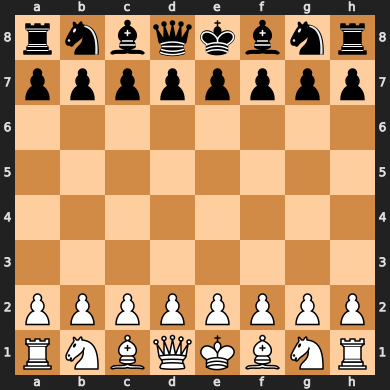

In [4]:
board=chess.Board()
board

In [5]:
base_name = './tmp/test_noeaten.0.'
deepbot = agent(model,base_name+'3.pt',)
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('d2d4')

In [6]:
moves,values=deepbot.get_move_values(board,both_players=True)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
np.round(values.tolist())

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [9]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=2)

In [10]:
moves,values=deepMCTS.get_move_values(board)

MCTS - rollouts:100 Elapsed time: 0.15s = 0.00m


In [11]:
moves

[Move.from_uci('a2a3'),
 Move.from_uci('f2f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('g1f3'),
 Move.from_uci('g2g4'),
 Move.from_uci('c2c3'),
 Move.from_uci('g1h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('a2a4'),
 Move.from_uci('h2h4'),
 Move.from_uci('f2f4'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c4'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d4'),
 Move.from_uci('b2b3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('e2e4'),
 Move.from_uci('b2b4')]

In [12]:
values

array([0.64154917, 0.63471893, 0.64437436, 0.655664  , 0.65527663,
       0.65470043, 0.66488613, 0.64747813, 0.6511754 , 0.64452299,
       0.65418041, 0.64361651, 0.66528747, 0.63493804, 0.68963161,
       0.64306289, 0.64633429, 0.66082503, 0.65590674, 0.6102116 ])

In [13]:
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.6896316051483155],
       [Move.from_uci('c2c4'), 0.6652874708175659],
       [Move.from_uci('g1h3'), 0.6648861289024353],
       [Move.from_uci('h2h3'), 0.6608250260353088],
       [Move.from_uci('e2e4'), 0.6559067368507385],
       [Move.from_uci('g1f3'), 0.6556640028953552],
       [Move.from_uci('g2g4'), 0.6552766323089599],
       [Move.from_uci('c2c3'), 0.6547004342079162],
       [Move.from_uci('f2f4'), 0.6541804075241089],
       [Move.from_uci('a2a4'), 0.6511754035949707],
       [Move.from_uci('g2g3'), 0.6474781274795532],
       [Move.from_uci('b1a3'), 0.6463342905044556],
       [Move.from_uci('h2h4'), 0.6445229887962342],
       [Move.from_uci('b1c3'), 0.6443743586540223],
       [Move.from_uci('d2d3'), 0.643616509437561],
       [Move.from_uci('b2b3'), 0.6430628895759583],
       [Move.from_uci('a2a3'), 0.6415491700172424],
       [Move.from_uci('e2e3'), 0.6349380373954773],
       [Move.from_uci('f2f3'), 0.6347189307212829],
       [Move.

MCTS - rollouts:200 Elapsed time: 0.14s = 0.00m


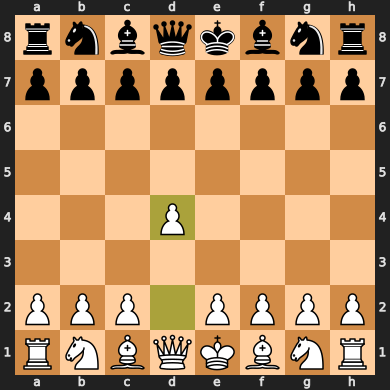

In [14]:
move=deepMCTS.select_move(board)
board.push(move)
board

In [15]:
acc,acc_w,boards,data = kaufman_test(deepbot,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 7/25 = 0.28 | weighted = 0.78
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6028 & c1c7 & 0.8570  \\
02 & f5d4 & 21 & 39 & 0.4737 & 0.6340 & a5d2 & 0.8480  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5060 & f2c5 & 0.9166  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7354 & b1b2 & 0.7354  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9494 & c8c3 & 0.9652  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5175 & a3a2 & 0.5175  \\
07 & b7e4 & 28 & 33 & 0.1562 & 0.4157 & c8e8 & 0.5566  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.3948 & e1c1 & 0.8030  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.5897 & d2h6 & 0.7519  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.7615 & c7a5 & 0.7646  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8507 & g3f5 & 0.8507  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0049 & e7e4 & 0.0164  \\
13 & c3d5 & 8 & 30 & 0.7586 & 0.9945 & f1f6 & 0.9999  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.3167 & d3g6 & 0.9083  \\
15 & d3f5 & 6 & 51 & 0.9000 & 0.6632 & h6f8 & 0.8363  \\
16 & b3b4 & 1 & 10 & 1.0000 & 0.7953 & b

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.602791,c1c7,0.857030,6,48,0.893617
1,f5d4,0.634004,a5d2,0.848028,21,39,0.473684
2,e1d1,0.505972,f2c5,0.916630,21,38,0.459459
3,b1b2,0.735360,b1b2,0.735360,1,47,1.000000
4,g5c1,0.949427,c8c3,0.965190,2,48,0.978723
5,a3a2,0.517546,a3a2,0.517546,1,31,1.000000
6,b7e4,0.415699,c8e8,0.556603,28,33,0.156250
7,h7h6,0.394792,e1c1,0.802965,11,39,0.736842
8,f3e2,0.589749,d2h6,0.751859,8,35,0.794118
9,d5c3,0.761462,c7a5,0.764555,2,41,0.975000


In [16]:
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.14s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.14s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.16s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.16s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.18s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.16s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 0.14s = 0.00m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.604572,c1c7,0.882264,9,48,0.829787
1,f5d4,0.598638,a5d2,0.898891,19,39,0.526316
2,e1d1,0.472225,f2c5,0.917463,20,38,0.486486
3,b1b2,0.776549,b1b2,0.776549,1,47,1.000000
4,g5c1,0.960606,c8c3,0.974760,2,48,0.978723
5,a3a2,0.549437,a3a2,0.549437,1,31,1.000000
6,b7e4,0.420348,c8e8,0.595174,22,33,0.343750
7,h7h6,0.415139,e1c1,0.869644,10,39,0.763158
8,f3e2,0.575703,d2b2,0.662734,7,35,0.823529
9,d5c3,0.706800,a7a5,0.706942,2,41,0.975000


In [17]:
deepMCTS.set_max_iter(1000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.43s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.44s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.45s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.54s = 0.03m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.46s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.37s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.53s = 0.03m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - ro

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.581573,c1c7,0.869557,11,48,0.787234
1,f5d4,0.593303,a5d2,0.813742,22,39,0.447368
2,e1d1,0.432412,f2c5,0.893098,24,38,0.378378
3,b1b2,0.760496,b1b2,0.760496,1,47,1.000000
4,g5c1,0.870644,c8c3,0.886347,2,48,0.978723
5,a3a2,0.490153,a3a2,0.490153,1,31,1.000000
6,b7e4,0.412388,c8e8,0.524461,26,33,0.218750
7,h7h6,0.418066,e1c1,0.787670,16,39,0.605263
8,f3e2,0.520351,d2h6,0.655014,9,35,0.764706
9,d5c3,0.702986,d5c3,0.702986,1,41,1.000000


In [18]:
deepMCTS.set_max_iter(10000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.16s = 0.25m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 14.87s = 0.25m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.07s = 0.25m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.76s = 0.26m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.45s = 0.26m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.14s = 0.25m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:10000 Elapsed time: 15.24s = 0.25m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.604786,c1c7,0.850605,6,48,0.893617
1,f5d4,0.559493,a5d2,0.774490,18,39,0.552632
2,e1d1,0.480356,f2c5,0.680187,22,38,0.432432
3,b1b2,0.758425,b1b2,0.758425,1,47,1.000000
4,g5c1,0.693295,g5c1,0.693295,1,48,1.000000
5,a3a2,0.467755,a3a2,0.467755,1,31,1.000000
6,b7e4,0.399373,c7d8,0.489113,27,33,0.187500
7,h7h6,0.421329,e1c1,0.566639,8,39,0.815789
8,f3e2,0.555222,d2a5,0.653022,7,35,0.823529
9,d5c3,0.644851,d5c3,0.644851,1,41,1.000000


In [19]:
G = MCTS_graph(deepMCTS)
G.save_graph("mcts.dot",depth=2)

Total nodes: 176
Grafo guardado en: mcts.dot


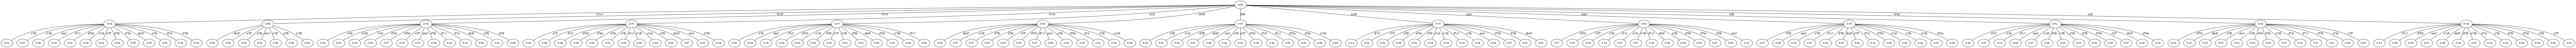

In [20]:
g = nx.Graph(nx.drawing.nx_pydot.read_dot("mcts.dot"))
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('example.png')
pil_im = Image.open('example.png', 'r')
display(pil_im)